In [1]:
! pip install tensorflow 

  Using cached typing_extensions-3.7.4.3-py3-none-any.whl.metadata (2.0 kB)
   ---------------------------------------- 0.0/13.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/13.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/13.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/13.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/13.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/13.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/13.3 MB 81.9 kB/s eta 0:02:42
   ---------------------------------------- 0.0/13.3 MB 81.9 kB/s eta 0:02:42
   ---------------------------------------- 0.0/13.3 MB 89.3 kB/s eta 0:02:29
   ---------------------------------------- 0.1/13.3 MB 126.1 kB/s eta 0:01:45
   ---------------------------------------- 0.1/13.3 MB 126.1 kB/s eta 0:01:45
   ---------------------------------------- 0.1/13.3 MB 143.4 kB/s eta 0:01:32
   ------------------------------

  You can safely remove it manually.
  You can safely remove it manually.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
altair 5.2.0 requires typing-extensions>=4.0.1; python_version < "3.11", but you have typing-extensions 3.7.4.3 which is incompatible.
async-lru 2.0.4 requires typing-extensions>=4.0.0; python_version < "3.11", but you have typing-extensions 3.7.4.3 which is incompatible.
fastapi 0.110.0 requires typing-extensions>=4.8.0, but you have typing-extensions 3.7.4.3 which is incompatible.
pandas 2.2.1 requires numpy<2,>=1.22.4; python_version < "3.11", but you have numpy 1.19.5 which is incompatible.
scipy 1.12.0 requires numpy<1.29.0,>=1.22.4, but you have numpy 1.19.5 which is incompatible.
seaborn 0.13.2 requires numpy!=1.24.0,>=1.20, but you have numpy 1.19.5 which is incompatible.
starlette 0.36.3 requires typing-extensions>=3.10.0; python_ve

In [2]:
import tensorflow as tf
from tensorflow.keras import models,layers
import matplotlib.pyplot as plt

In [3]:
IMAGE_SIZE = 256
BATCH_SIZE = 32
CHANNELS = 3
EPOCHS = 50

In [4]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "plantVillage",
    shuffle = True,
    image_size = (IMAGE_SIZE,IMAGE_SIZE),
    batch_size =BATCH_SIZE
)

Found 2152 files belonging to 3 classes.


In [5]:
class_names = dataset.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [6]:
len(dataset)

68

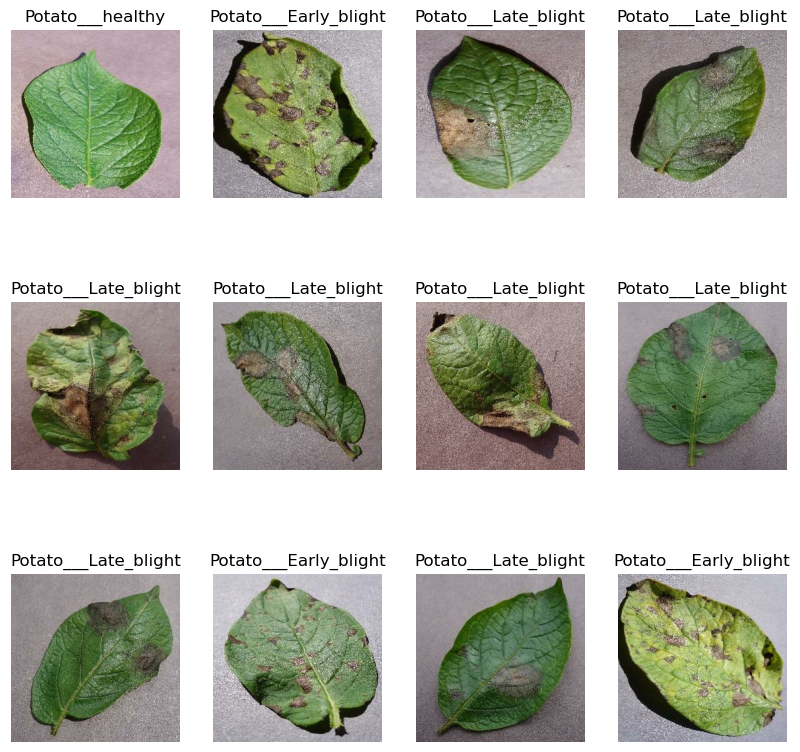

In [7]:
plt.figure(figsize =(10,10))
for image_batch, label_batch in dataset.take(1):
    for i in range(12):
        ax = plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[label_batch[i]])
        plt.axis('off')
        
 

In [8]:
len(dataset)

68

In [9]:
80% ==> training
20% ==> 10% validation, 10% test

SyntaxError: invalid syntax (829920516.py, line 1)

In [10]:
train_size = 0.8
len(dataset)*train_size

54.400000000000006

In [11]:
train_ds=dataset.take(54)
len(train_ds)

54

In [12]:
test_ds = dataset.skip(54)
len(test_ds)

14

In [13]:
val_size =0.1
len(dataset)*val_size

6.800000000000001

In [14]:
val_ds = test_ds.take(6)
len(val_ds)

6

In [15]:
val_ds = test_ds.skip(6)
len(test_ds)

14

In [16]:
def get_dataset_partitions_tf(ds,train_split= 0.8,val_split= 0.1,test_split= 0.1,Shuffle=True,shuffle_size =10000 ):
   
    ds_size = len(ds)
    if Shuffle:
        ds = ds.shuffle(shuffle_size,seed = 12)
        
    train_size = int(train_split * ds_size)
    val_size = int(val_split* ds_size)
    
    trin_ds = ds.take(train_size)
    
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    
    return train_ds,val_ds,test_ds

In [17]:
train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)


In [18]:
len(train_ds)

54

In [19]:
len(val_ds)

6

In [20]:
len(test_ds)

8

In [21]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)

In [22]:
resize_and_rescale = tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE, IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1.0/255)
])

In [23]:
data_augmentation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2)
])

In [24]:
from tensorflow.keras import models, layers

input_shape = (256, 256, 3)
n_classes = 3

model = models.Sequential([
    layers.Input(shape=input_shape),  
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax')
])
 

In [25]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 256, 256, 3)       0         
                                                                 
 sequential_1 (Sequential)   (None, 256, 256, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 64)        0         
 g2D)                                                 

In [26]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [27]:
history = model.fit(
    train_ds,
    epochs = EPOCHS,
    batch_size = BATCH_SIZE,
    verbose = 1,
    validation_data=val_ds
)

Epoch 1/50


54/54 [==============================] - 49s 777ms/step - loss: 0.8966 - accuracy: 0.5174 - val_loss: 0.8342 - val_accuracy: 0.5000
Epoch 2/50
54/54 [==============================] - 42s 784ms/step - loss: 0.6613 - accuracy: 0.7060 - val_loss: 0.5086 - val_accuracy: 0.7857
Epoch 3/50
54/54 [==============================] - 40s 744ms/step - loss: 0.5091 - accuracy: 0.7841 - val_loss: 0.4719 - val_accuracy: 0.7976
Epoch 4/50
54/54 [==============================] - 40s 738ms/step - loss: 0.3749 - accuracy: 0.8455 - val_loss: 0.3433 - val_accuracy: 0.8512
Epoch 5/50
54/54 [==============================] - 40s 745ms/step - loss: 0.3235 - accuracy: 0.8669 - val_loss: 0.4070 - val_accuracy: 0.8393
Epoch 6/50
54/54 [==============================] - 40s 747ms/step - loss: 0.2269 - accuracy: 0.9115 - val_loss: 0.1707 - val_accuracy: 0.9226
Epoch 7/50
54/54 [==============================] - 39s 715ms/step - loss: 0.2262 - accuracy: 0.9109 - val_loss: 0.2913 - val_accuracy: 0.86

In [28]:
scores = model.evaluate(test_ds)


8/8 [==============================] - 2s 155ms/step - loss: 0.0715 - accuracy: 0.9727


In [29]:
scores


[0.0714806392788887, 0.97265625]

In [33]:
history

In [34]:
history.params

{'verbose': 1, 'epochs': 50, 'steps': 54}

In [35]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [36]:
type(history.history['loss'])


list

In [37]:
len(history.history['loss'])


50

In [38]:
history.history['loss'][:5] # show loss for first 5 epochs


[0.9120581746101379,
 0.6540820002555847,
 0.4070240557193756,
 0.2635073959827423,
 0.29565224051475525]

In [39]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

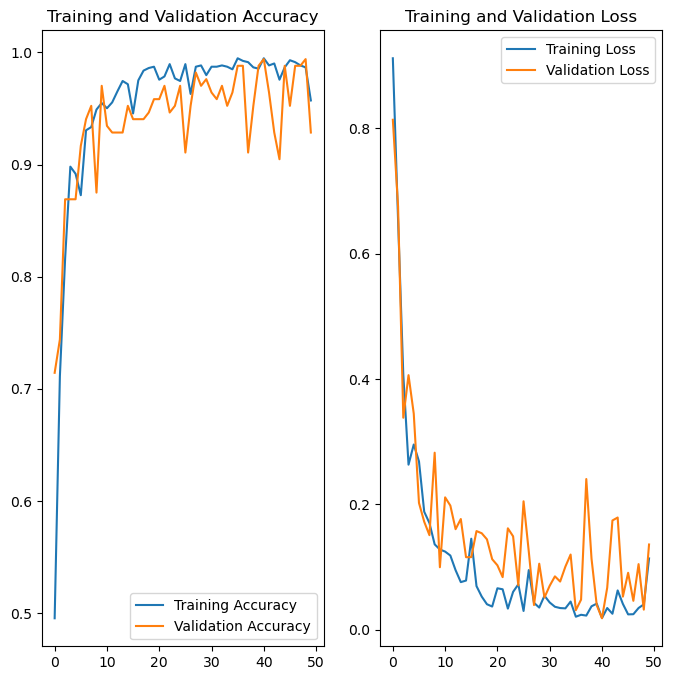

In [40]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

first image to predict
actual label: Potato___Late_blight
1/1 [==============================] - 1s 893ms/step
predicted label: Potato___Late_blight


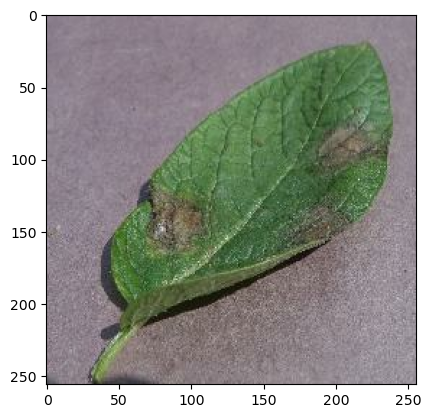

In [31]:
import numpy as np
for images_batch, labels_batch in test_ds.take(1):
    
    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])
    
    batch_prediction = model.predict(images_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])

In [32]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 [==============================] - 0s 50ms/step


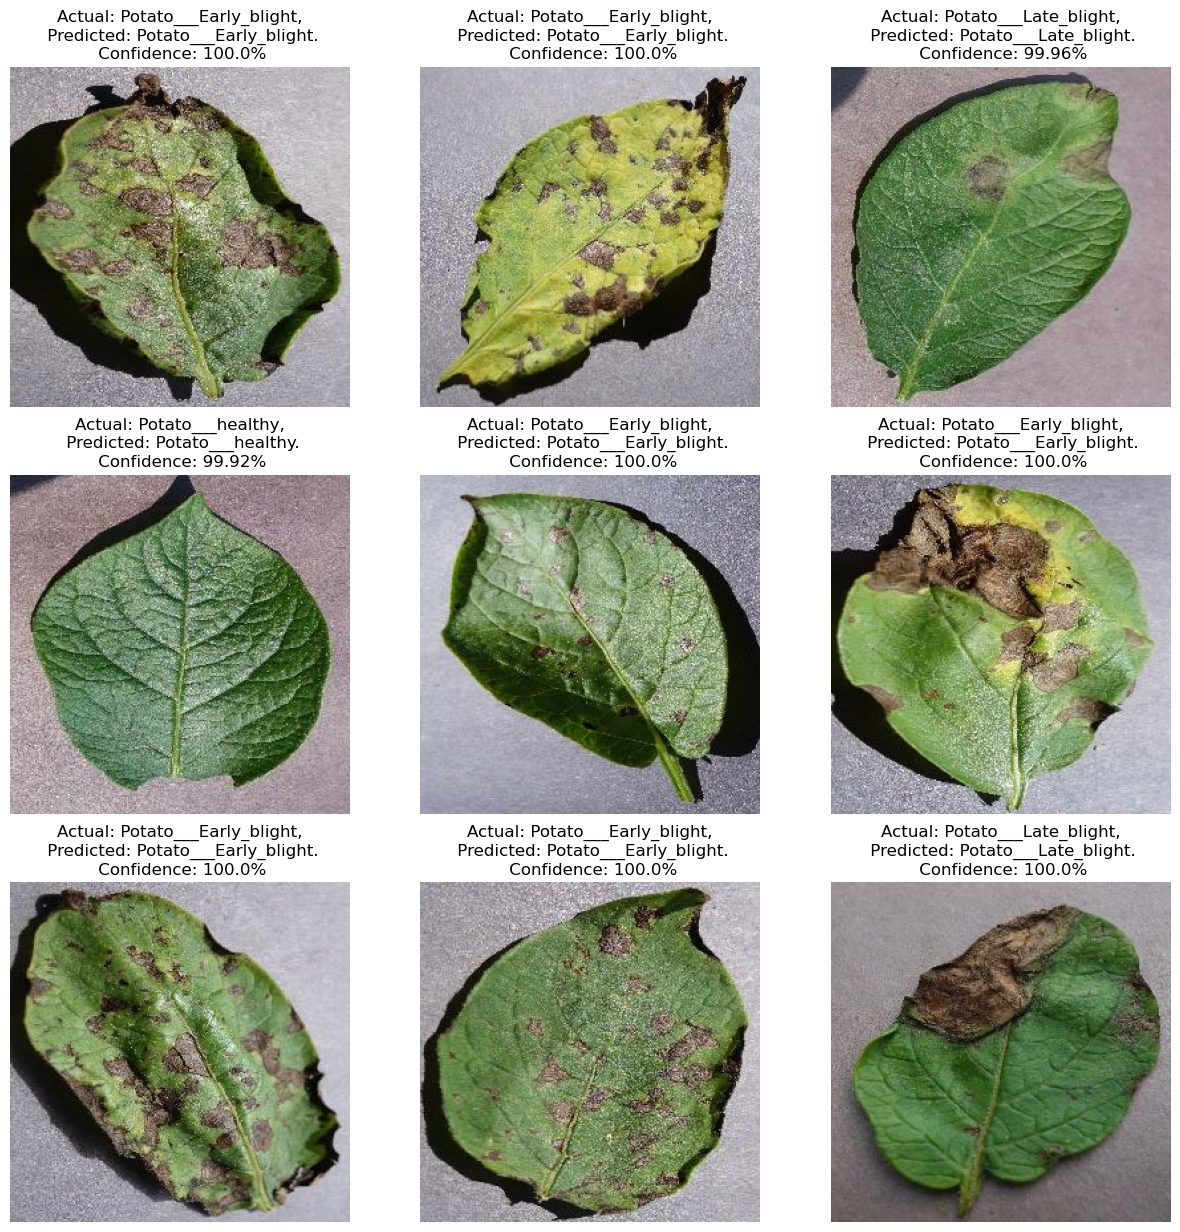

In [33]:
plt.figure(figsize=(15, 15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")

In [44]:
import os
model_version=max([int(i) for i in os.listdir("../models") + [0]])+1
model.save(f"../models/{model_version}")

FileNotFoundError: [WinError 3] The system cannot find the path specified: '../models'

In [45]:
model.save("../potatoes.h5")

C:\Users\KIIT\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
